<a href="https://colab.research.google.com/github/mars-orbiter/Short-Projects/blob/main/the_lighthouse_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Problem - the lighthouse

This problem was set by Steve Gull to first year Cambridge students many years ago. It contrasts the Bayesian approach with an estimator-based approach.
A lighthouse is situated at unknown coordinates $(x_0, y_0)$ with respect to a straight coastline $y = 0$. It sends a series of N flashes in random directions, and these are recorded on the coastline at positions $x_i$ ;
 $i = 1 . . . N$. Only the positions of the arrivals of the flashes, not the directions, nor the intensities, are recorded. Using a Bayesian approach, find the posterior distribution of $x_0, y_0$.
Now focus only on the unknown $x_0$. Define a suitable estimator, $\hat{x}$, for $x_0$ from the observed $x_i$. Work out the probability distribution for $\hat{x}$. You may need to refer to a proof the Central Limit Theorem, for the pdf of repeated trials of the same experiment. You
may also find this useful:
$$\int^{\infty}_{-\infty} e^{ikx} \frac{1}{\left[ 1 + \frac{(x-x_0)^2}{y_0^2} \right]} dx = e^{ikx_0 - |k|y_0}$$


Comment : 
You can get some extra points if you simulate this process, compute the posterior distribution, and also show the estimator.

The coordinate of lighthouse is (9.44, 5.47)


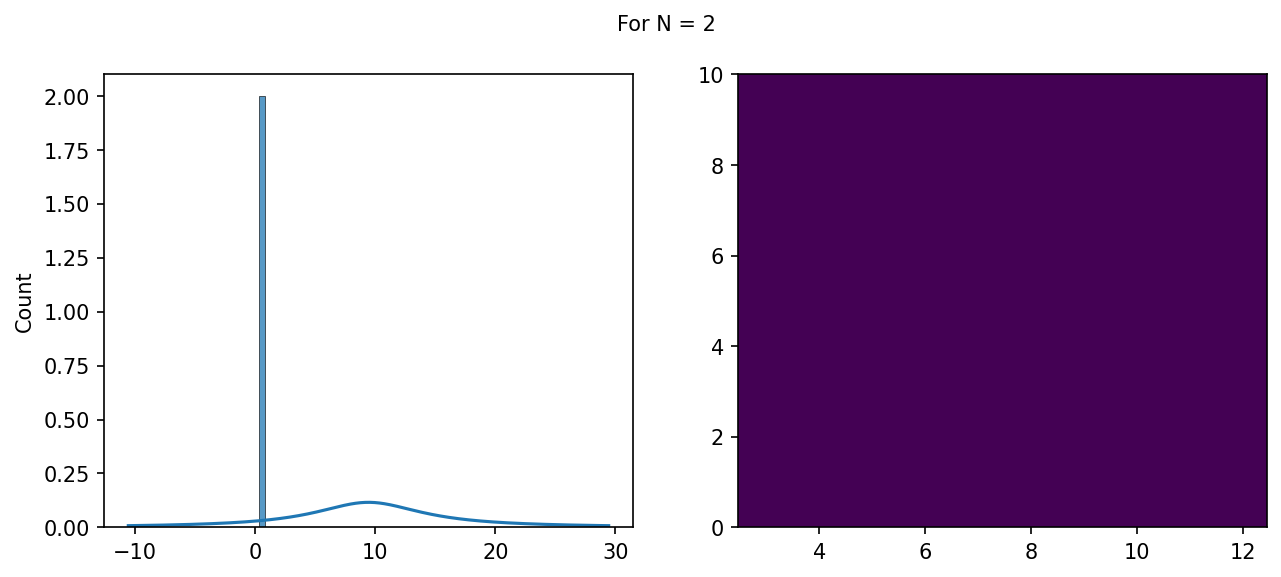

___________________________________________________________________________________________________________________________________________________________________


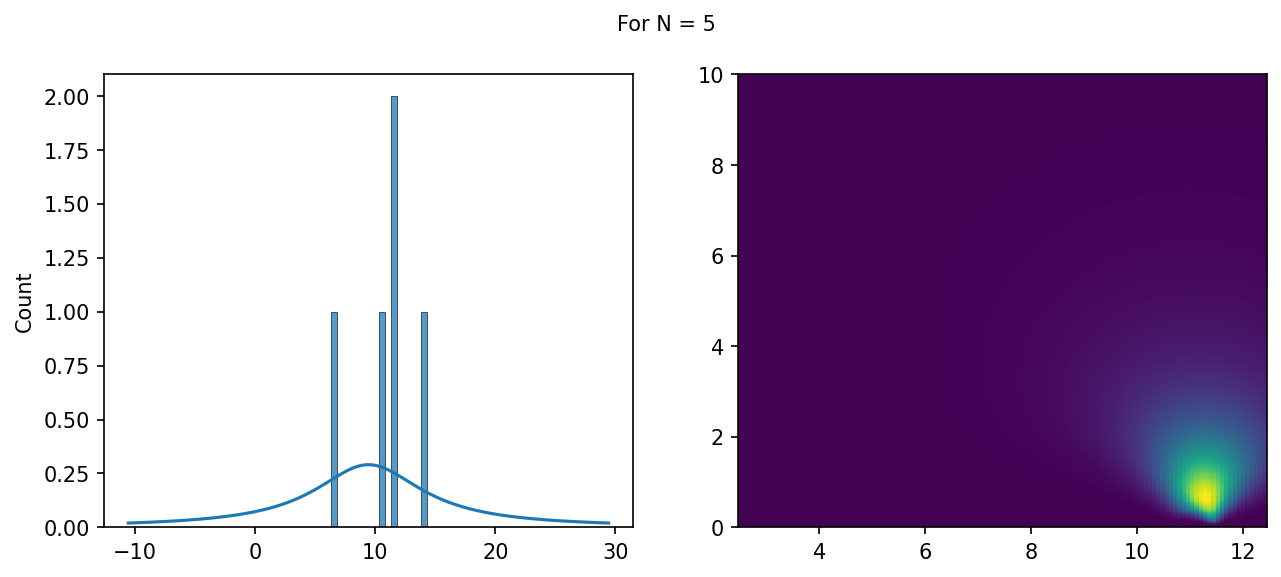

___________________________________________________________________________________________________________________________________________________________________


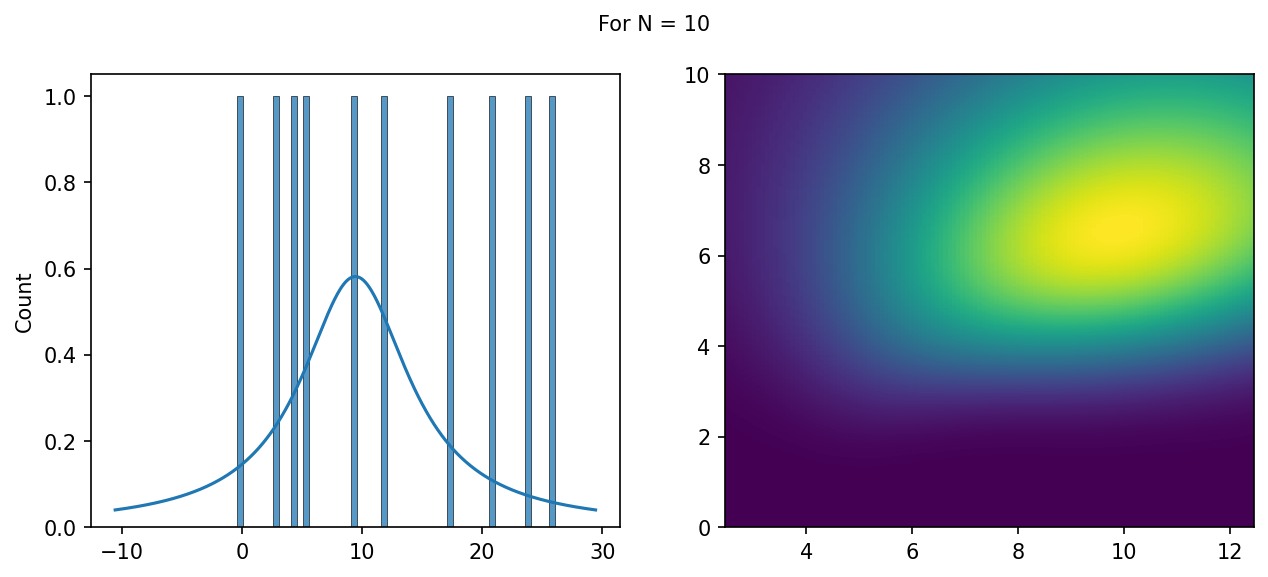

___________________________________________________________________________________________________________________________________________________________________


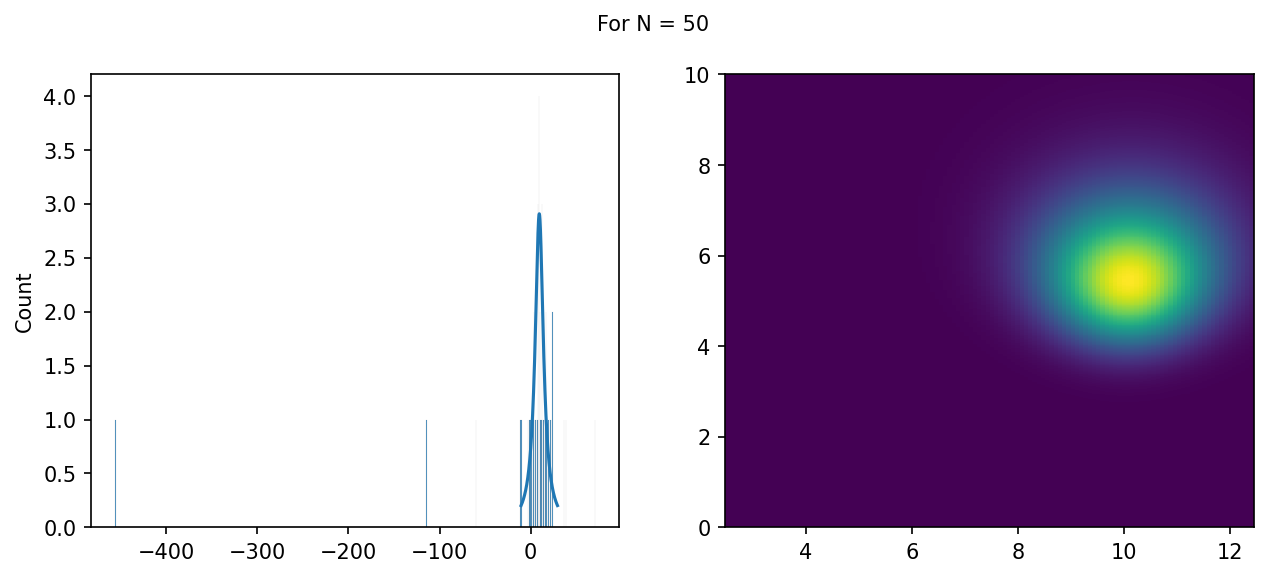

___________________________________________________________________________________________________________________________________________________________________


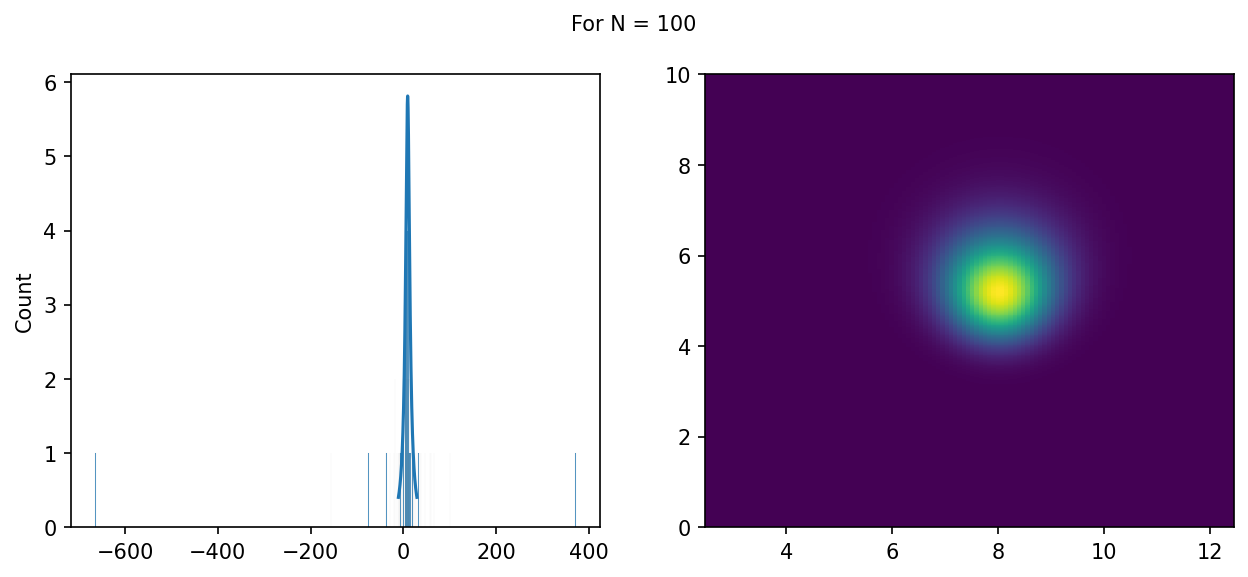

___________________________________________________________________________________________________________________________________________________________________


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random



'''
We need to restrict the location of Light house so to save the computation 
power. Then we can Randomly Choose the x_0 and y_0 in a given restricted area.
Here I will define x_max and y_max so to restrict the lighthouse in the zone
for which x_0 varies from 0 to x_max and y_0 varies from o to y_max
'''

x_max = 10
y_max = 10

x_0 = x_max*random.random()
y_0 = y_max*random.random()

#printing the coordinate of lighthouse
print(f'The coordinate of lighthouse is ({round(x_0, 2)}, {round(y_0, 2 )})')

# N is the number of flashes by lighthouse
#creating loop for different N
n = [2, 5,10, 50, 100]
for N in n:

  #x is the location on coastline where a flash is observed   
  x = np.linspace(x_0-20, x_0+20, N)


  for i in range(N):
    theta = np.pi*random.random()
    x[i] = x_0 - y_0/np.tan(theta)

  #Plotting histogram of flashes and Expected Distribution
  M = 500
  xi = np.linspace(x_0-20, x_0 + 20, M)
  yi = np.linspace(0, y_max, M)
  
  pdf = (y_0/(np.pi*((xi-x_0)**2 + y_0**2)))*N

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi = 150)
  fig.suptitle(f'For N = {N}', fontsize=10)

  ax[0].plot(xi, pdf)
  sns.histplot(x, binwidth = 0.5, ax = ax[0])
  plt.xlim(x_0-10, x_0+10)
  # plt.show()

  prob = np.zeros((M,M))
  for i in range(M):
    for j in range(M):
      prob[j,i] = np.prod((yi[j]/(np.pi*((x-xi[i])**2 + yi[j]**2))))

  #plotting the colormesh for probability of x_0 and y_0
  ax[1].pcolormesh(xi, yi, prob, shading= 'auto')
  plt.xlim(min(x_0, y_0)-3, max(x_0, y_0)+3)
  # plt.ylim(0, y_0+2)
  plt.show()
  print('___________________________________________________________________________________________________________________________________________________________________')